In [1]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Random seed to make results deterministic and reproducible
torch.manual_seed(0)

In [3]:
# scaling function for input data
def minmax_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)


# make dataset to train

In [4]:
# scaling function for input data
def minmax_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

In [5]:
# make dataset to input
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        _x = time_series[i:i + seq_length, :]
        _y = time_series[i + seq_length, [-1]]  # Next close price
        print(_x, "->", _y)
        dataX.append(_x)
        dataY.append(_y)
    return np.array(dataX), np.array(dataY)

In [6]:
# hyper parameters
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

In [7]:
# load data
xy = np.loadtxt("data-02-stock_daily.csv", delimiter=",")
xy = xy[::-1]  # reverse order

# split train-test set
train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]

# scaling data
train_set = minmax_scaler(train_set)
test_set = minmax_scaler(test_set)

# make train-test dataset to input
trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

# convert to tensor
trainX_tensor = torch.FloatTensor(trainX)
trainY_tensor = torch.FloatTensor(trainY)

testX_tensor = torch.FloatTensor(testX)
testY_tensor = torch.FloatTensor(testY)

[[2.53065030e-01 2.45070970e-01 2.33983036e-01 4.66075110e-04
  2.32039560e-01]
 [2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.78314566e-01 1.98470380e-01 5.70171193e-01
  1.78104644e-01]] -> [0.16053716]
[[2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.7831

 [0.80910663 0.80019865 0.82039652 0.18531863 0.7901762 ]] -> [0.83228187]
[[0.81714539 0.81469361 0.85719795 0.13477637 0.8491804 ]
 [0.81266032 0.81231195 0.83006228 0.18480774 0.81795327]
 [0.79264985 0.7982932  0.82673301 0.14341669 0.83002868]
 [0.82045755 0.83371431 0.8687251  0.12176212 0.85495413]
 [0.81542035 0.82282591 0.86305111 0.16395985 0.84027334]
 [0.80910663 0.80019865 0.82039652 0.18531863 0.7901762 ]
 [0.76228892 0.7945502  0.80106522 0.17011742 0.83228187]] -> [0.8193966]
[[0.81266032 0.81231195 0.83006228 0.18480774 0.81795327]
 [0.79264985 0.7982932  0.82673301 0.14341669 0.83002868]
 [0.82045755 0.83371431 0.8687251  0.12176212 0.85495413]
 [0.81542035 0.82282591 0.86305111 0.16395985 0.84027334]
 [0.80910663 0.80019865 0.82039652 0.18531863 0.7901762 ]
 [0.76228892 0.7945502  0.80106522 0.17011742 0.83228187]
 [0.80952062 0.80256329 0.84293911 0.13471363 0.8193966 ]] -> [0.8711485]
[[0.79264985 0.7982932  0.82673301 0.14341669 0.83002868]
 [0.82045755 0.83371431

 [0.83034597 0.81556125 0.85575466 0.07523435 0.84403567]] -> [0.86858608]
[[0.73616683 0.76864135 0.77978517 0.17514303 0.77814969]
 [0.79125947 0.78809309 0.83049214 0.16295496 0.7958306 ]
 [0.77153656 0.76256986 0.79947427 0.10961814 0.79493482]
 [0.79725431 0.81461829 0.83903438 0.12098623 0.8285645 ]
 [0.81529885 0.82251706 0.84757626 0.1060959  0.83698714]
 [0.83034597 0.81556125 0.85575466 0.07523435 0.84403567]
 [0.84347469 0.8426171  0.88749985 0.10121322 0.86858608]] -> [0.90185774]
[[0.79125947 0.78809309 0.83049214 0.16295496 0.7958306 ]
 [0.77153656 0.76256986 0.79947427 0.10961814 0.79493482]
 [0.79725431 0.81461829 0.83903438 0.12098623 0.8285645 ]
 [0.81529885 0.82251706 0.84757626 0.1060959  0.83698714]
 [0.83034597 0.81556125 0.85575466 0.07523435 0.84403567]
 [0.84347469 0.8426171  0.88749985 0.10121322 0.86858608]
 [0.86925245 0.87626864 0.92209184 0.1140722  0.90185774]] -> [0.90908564]
[[0.77153656 0.76256986 0.79947427 0.10961814 0.79493482]
 [0.79725431 0.814618

In [8]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, layers):
        super(Net, self).__init__()
        self.rnn = torch.nn.LSTM(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, output_dim, bias=True)

    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x[:, -1])
        return x


net = Net(data_dim, hidden_dim, output_dim, 1)

In [9]:
# loss & optimizer setting
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

In [10]:
# start training
for i in range(iterations):

    optimizer.zero_grad()
    outputs = net(trainX_tensor)
    loss = criterion(outputs, trainY_tensor)
    loss.backward()
    optimizer.step()
    print(i, loss.item())

0 0.2271038442850113
1 0.18340937793254852
2 0.15106438100337982
3 0.12612313032150269
4 0.10598734766244888
5 0.08915018290281296
6 0.07493706792593002
7 0.06327901780605316
8 0.054496027529239655
9 0.04902385547757149
10 0.04693441092967987
11 0.04731706529855728
12 0.04838264361023903
13 0.04839478060603142
14 0.04633766785264015
15 0.04207771271467209
16 0.03620169684290886
17 0.029662009328603745
18 0.02338656224310398
19 0.018011242151260376
20 0.013800662942230701
21 0.010714655742049217
22 0.008532220497727394
23 0.0069765085354447365
24 0.0058244820684194565
25 0.004987422842532396
26 0.0045247129164636135
27 0.004554683342576027
28 0.005089898128062487
29 0.005920968018472195
30 0.006684894207865
31 0.0070726750418543816
32 0.006973991170525551
33 0.006471904926002026
34 0.005753521807491779
35 0.0050146933645009995
36 0.004395292140543461
37 0.003953744191676378
38 0.003676638938486576
39 0.0035109841264784336
40 0.0034013083204627037
41 0.0033151081297546625
42 0.0032488943

330 0.0014404556713998318
331 0.0014388707932084799
332 0.0014372927835211158
333 0.0014357214095070958
334 0.0014341564383357763
335 0.0014325982192531228
336 0.0014310461701825261
337 0.001429500407539308
338 0.0014279616298153996
339 0.0014264287892729044
340 0.001424902118742466
341 0.0014233817346394062
342 0.001421867636963725
343 0.001420359592884779
344 0.0014188579516485333
345 0.001417362131178379
346 0.0014158724807202816
347 0.0014143888838589191
348 0.0014129113405942917
349 0.0014114397345110774
350 0.0014099739491939545
351 0.001408513868227601
352 0.00140706030651927
353 0.0014056123327463865
354 0.0014041707618162036
355 0.0014027344295755029
356 0.0014013039181008935
357 0.0013998799258843064
358 0.001398461521603167
359 0.0013970487052574754
360 0.0013956426410004497
361 0.0013942418154329062
362 0.001392847509123385
363 0.0013914586743339896
364 0.0013900758931413293
365 0.001388699864037335
366 0.001387329655699432
367 0.0013859651517122984
368 0.001384607166983187

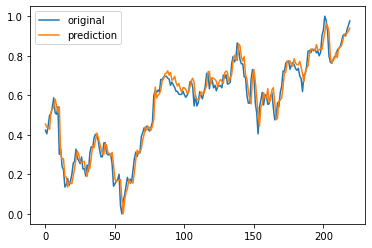

In [11]:
plt.plot(testY)
plt.plot(net(testX_tensor).data.numpy())
plt.legend(['original', 'prediction'])
plt.show()